# Machine Learning Review Exercise 3 (ML_SP22_RE_3) on EDA

### Due Date: 3/7/2022 23:59 pm

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***The goal of this review excercise is to practice Explorary Data Analysis similar to what we had shown in class***

***in particular***

* Check if there are any missing values
* Handle missing values by dropping the rows or fill in missing values by imputation
* Check for outliers and remove them (if needed)
* Compute simple statistics on single variables
* Basic Plots (pairplots, boxplots etc)
* Investigate Categorial Variables
* Facet Grid
* Build simple linear regression model

In [13]:
df = pd.read_csv("Salaries2.csv")
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


In [14]:
df.tail()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
398,Prof,A,33.0,30.0,Male,103106
399,Prof,A,31.0,19.0,Male,150564
400,Prof,A,42.0,25.0,Male,101738
401,Prof,A,25.0,15.0,Male,95329
402,AsstProf,A,8.0,4.0,Male,81035


In [15]:
df.describe()

,YrsSincePhd,YrsOfService,Salary
count,402.000000,402.000000,4.030000e+02
mean,22.258706,17.684080,1.160301e+05
std,12.870455,13.571541,5.398971e+04
min,1.000000,0.000000,5.780000e+04
25%,12.000000,7.000000,9.116350e+04
50%,21.000000,16.000000,1.073090e+05
75%,32.000000,26.000000,1.343675e+05
max,56.000000,101.000000,1.012100e+06


In [16]:
df.shape

(403, 6)

### Check Missing Data

In [17]:
#df.isnull().any() 
df.isnull().sum()

Rank            0
Discipline      0
YrsSincePhd     1
YrsOfService    1
Sex             2
Salary          0
dtype: int64

### Remove missing data rows

In [18]:
df = df.dropna()
# or
# df.dropna(inplace=True)
df.isnull().sum()

Rank            0
Discipline      0
YrsSincePhd     0
YrsOfService    0
Sex             0
Salary          0
dtype: int64

In [19]:
df.isnull().any()

Rank            False
Discipline      False
YrsSincePhd     False
YrsOfService    False
Sex             False
Salary          False
dtype: bool

In [20]:
df.shape

(399, 6)

### check and remove outliers

<AxesSubplot:xlabel='YrsSincePhd'>

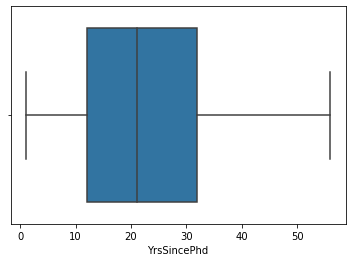

In [21]:
sns.boxplot(x=df['YrsSincePhd'])

<AxesSubplot:xlabel='YrsOfService'>

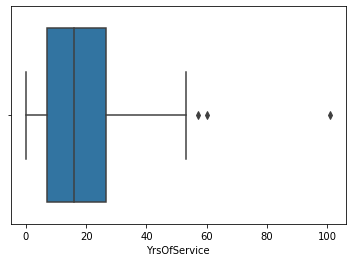

In [22]:
sns.boxplot(x=df['YrsOfService'])

<AxesSubplot:xlabel='Salary'>

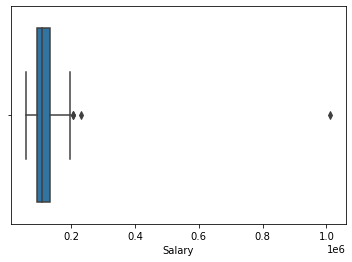

In [23]:
sns.boxplot(x=df['Salary'])

In [24]:
# use your own discretion on exactly what numbers one should use as a cutoff
df = df[df['YrsOfService'] < 80]
df = df[df['Salary'] < 500000]

<AxesSubplot:xlabel='YrsOfService'>

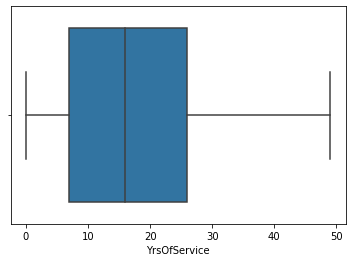

In [25]:
sns.boxplot(x=df['YrsOfService'])

<AxesSubplot:xlabel='Salary'>

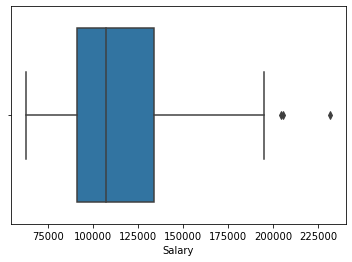

In [26]:
sns.boxplot(x=df['Salary'])

### Simple plots using Seaborn

<AxesSubplot:xlabel='Rank', ylabel='count'>

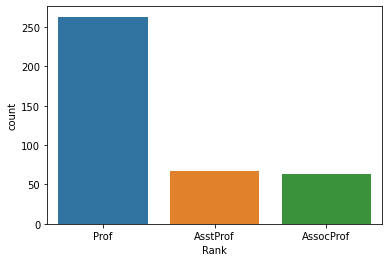

In [27]:
sns.countplot(df['Rank'])

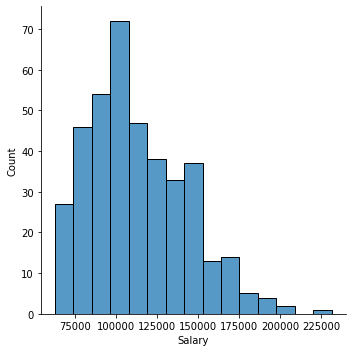

In [29]:
sns.displot(df['Salary'])

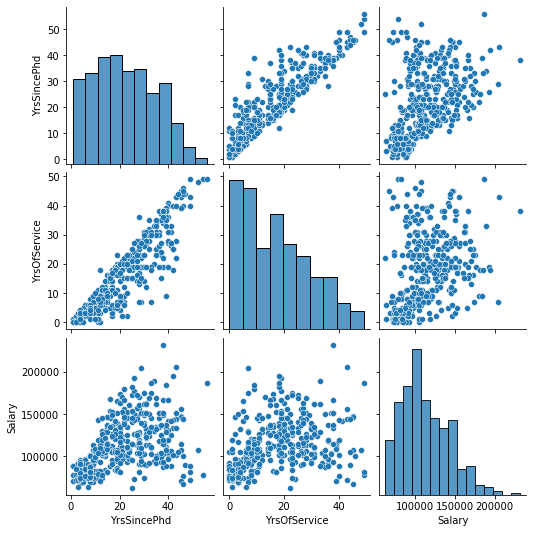

In [30]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Rank', ylabel='Salary'>

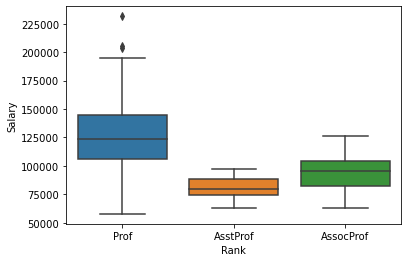

In [32]:
sns.boxplot(x='Rank', y='Salary', data=df)

### calculate Correlation, find out which variables have the highest correlation with Salary

In [51]:
df.corr()

,YrsSincePhd,YrsOfService,Salary
YrsSincePhd,1.000000,0.909341,0.415792
YrsOfService,0.909341,1.000000,0.330874
Salary,0.415792,0.330874,1.000000


Based on the correlation results above, we can see that `YrsSincePhd` has a higher correlation with salary than `YrsOfService`.

### Now focus on the relationship between that variable and Salary. Do a scatter if needed

<AxesSubplot:xlabel='YrsSincePhd', ylabel='Salary'>

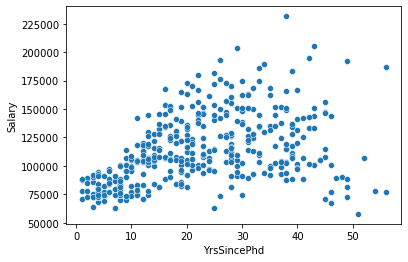

In [35]:
sns.scatterplot(x='YrsSincePhd', y='Salary', data=df)

### Fit a linear Regression model 

<AxesSubplot:>

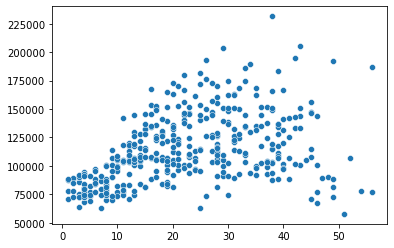

In [37]:
# Extract a numpy array from the dataframe
X = df['YrsSincePhd'].values
Y = df['Salary'].values
sns.scatterplot(x=X, y=Y)

In [38]:
# create a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:
# Need a 2D numpy array, so call reshape(-1, 1)
X = df['YrsSincePhd'].values.reshape(-1,1)
Y = df['Salary'].values.reshape(-1,1)

In [40]:
# Fit the model
model.fit(X, Y)

LinearRegression()

In [41]:
# now make the prediction
Y_pred = model.predict(X)

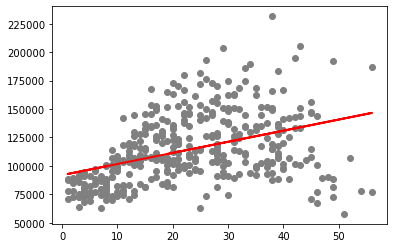

In [44]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

In [45]:
print(model.intercept_)
print(model.coef_)

[91910.7498152]
[[976.91675041]]


## Now investigate how the categorical variables affect the Salary

In [46]:
df.head()

,Rank,Discipline,YrsSincePhd,YrsOfService,Sex,Salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500


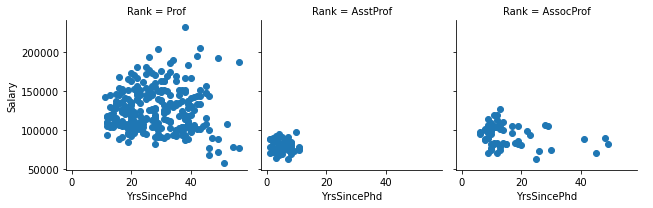

In [47]:
g = sns.FacetGrid(df, col = 'Rank')
g = (g.map(plt.scatter, "YrsSincePhd", "Salary").add_legend())

From the diagrams above, we can see that if the `Rank` is `Prof`, then the salary is usually much higher than `AsstProf` or `AssocProf`. However, `Prof` have to have more years since PhD, to possess their rank. As seen from the `AsstProf`, they tend to have less years since PhD, meaning that their salary is on the lower end. Moreover, `AssocProf` make roughly the same amount as time moves forward since their PhD.

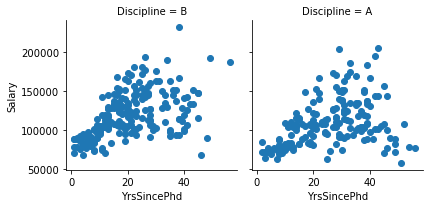

In [48]:
g = sns.FacetGrid(df, col = 'Discipline')
g = (g.map(plt.scatter, "YrsSincePhd", "Salary").add_legend())

From the diagrams above, no matter what `discipline` we view, the `salary` seems to increase as the years pass since PhD.

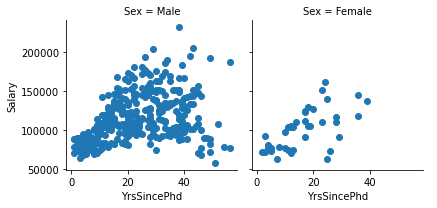

In [49]:
g = sns.FacetGrid(df, col = 'Sex')
g = (g.map(plt.scatter, "YrsSincePhd", "Salary").add_legend())

Based on the diagrams above, it looks as though as time moves forward, both men and women have higher salaries. If we had more data on female salaries, we would have been able to make a better analysis.